# Welcome to Lab_Regression! 🥣 🥛

One of the coolest things about Data Science is prediction. Until now, we have done a lot of data analysis from historic or recorded data points, we have also generated our own data through simulation, but today we will be predicting data! 

As you learned in the lecture, **linear regression** is an extremely powerful tool to quantify trends that we see in the dataset and it is also fairly easy to do so when using Python! 😃

In this lab, we will be doing EDA and Simple Linear Regression to see if we can predict the weight of cereals.

## Your Group

Edit the next Python cell to add information about who you're working within your lab section:

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Daniel"
ca1_name = "Linh"
ca2_name = "Eeshan"


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# QOTD to Ask Your Group: "What are your plans for Thanksgiving?"
partner1_name = "David Mocianko"
partner1_netid = "dmoci2"
qotd_answer = "Visit home and family"

partner2_name = "Shane Moncayo"
partner2_netid = "moncayo3"
qotd_answer = "Spend time with family"

partner3_name = "Evan Walker"
partner3_netid = "evanaw3"
qotd_answer = "Spend time with family"

<hr style="color: #DD3403;">

## Part 1: Cereal Connossieur!!

Due to the recent Daylight Saving Time time change, you woke up earlier than usual. You do not know what to really do, but you do feel hungry. So you quickly go to your kitchen and find plethora of choices in cereal. Since you have excess amount of time, you feel the urge to analyze cereal's nutrition information using linear regression. You are very curious if you could predict the weight of the cereal based on it's nutritional aspects.


## Puzzle 1.1: Usual Steps
Let us import the `cereal.csv` dataset and make sure to import the appropriate libraries. You can name the variable for the dataframe `df_cereal`.

In [4]:
# Import cereal.csv dataset here
import pandas as pd
df_cereal = pd.read_csv("cereal.csv")
df_cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


### 🔬 Test Case Checkpoint 🔬

In [5]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(df_cereal) == 77 ), "Hmm...it seems like your df_cereal length is off? Did you import the right csv?"
assert("rating" in df_cereal), "This is not the Cereal dataset you're looking for. Check the import step."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: EDA
Before we begin applying our linear regression model, it is important to understand the intricacies of our data. In our case, the options we have to choose from for our cereal. We will make to do the following steps so we understand our options very well!

1. We will remove any unneccesary columns aka information we do not need.
2. We will see if all our information is being measured on the same scale.
3. We will plot some pretty visualizations!

It seems like there are certain columns we do not need. Remove the columns `mfr`, `type` and `shelf`. These columns won't really help us do this analysis! 

Hint: You can use ```df.drop(columns=drop_list)```

In [8]:
# Remove the specified columns here
drop_list = ["mfr", "type", "shelf"]
df_clean_cereal = df_cereal.drop(columns=drop_list)
df_clean_cereal

,name,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,68.402973
1,100% Natural Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,93.704912
4,Almond Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,1.0,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,1.0,1.00,27.753301
74,Wheat Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1.0,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1.0,1.00,51.592193


### 🔬 Test Case Checkpoint 🔬

In [9]:
## == TEST CASES for Puzzle 1.2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(df_clean_cereal.columns)-1 == 12 ), "Hmm...it seems like you did not remove all columns mentioned"
assert("mfr" not in df_clean_cereal), "Seems like we did not remove `mfr` column"
assert("type" not in df_clean_cereal), "Seems like we did not remove `type` column"
assert("shelf" not in df_clean_cereal), "Seems like we did not remove `shelf` column"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.3: Serving Size

It seems like the cup servings aren't the same for all cereals, and this might be an issue when we compare different cereal's nutrition. Let's fix that quickly!!!

Run the following code cell. ***Do not change anything in the below code cell***. The code ensures that all the cereal have the same cup serving to keep our data uniform. 

**Hint**: It's good practice to read code and understand what it's intentions are, it can sometimes help when you code on your own!

In [10]:
# Store the ratio for the column conversion:
# - By multiplying everything by (1 / cups), we scale everything to 1 cup.
ratio = 1 / df_clean_cereal["cups"]

# Go through every column in the DataFrame `df_clean_cereal.columns`:
for col in df_clean_cereal.columns:
   # If the column is numeric, scale it by the ratio:
   if pd.api.types.is_numeric_dtype(df_clean_cereal[col]):
      df_clean_cereal[col] = round(df_clean_cereal[col] * ratio, 2)

# Print out the DataFrame with two decimal points:
pd.set_option('display.precision', 6)
df_final = df_clean_cereal
df_final

,name,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,212.12,12.12,3.03,393.94,30.30,15.15,18.18,848.48,75.76,3.03,1.0,207.28
1,100% Natural Bran,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.00,1.00,1.0,33.98
2,All-Bran,212.12,12.12,3.03,787.88,27.27,21.21,15.15,969.70,75.76,3.03,1.0,180.08
3,All-Bran with Extra Fiber,100.00,8.00,0.00,280.00,28.00,16.00,0.00,660.00,50.00,2.00,1.0,187.41
4,Almond Delight,146.67,2.67,2.67,266.67,1.33,18.67,10.67,NaN,33.33,1.33,1.0,45.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,146.67,2.67,1.33,333.33,0.00,28.00,4.00,80.00,33.33,1.33,1.0,52.14
73,Trix,110.00,1.00,1.00,140.00,0.00,13.00,12.00,25.00,25.00,1.00,1.0,27.75
74,Wheat Chex,149.25,4.48,1.49,343.28,4.48,25.37,4.48,171.64,37.31,1.49,1.0,74.31
75,Wheaties,100.00,3.00,1.00,200.00,3.00,17.00,3.00,110.00,25.00,1.00,1.0,51.59


### 🔬 Test Case Checkpoint 🔬

In [11]:
## == TEST CASES for Puzzle 1.2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with a message (with the emoji showing), you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(sum(df_final['cups']) == 77.0 ), "Hmm...it seems like the cups in every row is not equal to 1. Make sure to re-run above code."
assert(len(df_final) == 77), "Seems like df_final is not correct. Make sure to re-run above code."
assert(df_final.iloc[3,1] == 100), "Seems like some numbers haven't been scaled properly. Make sure to re-run above code."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.4: Correlation Coefficient Matrix

Find the correlation coefficient matrix for `df_final`:

In [12]:
df_final.corr()

,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,weight,cups,rating
calories,1.000000,0.695204,0.571058,0.557641,0.397558,0.780057,0.550623,0.488560,0.460667,0.916907,NaN,0.555356
protein,0.695204,1.000000,0.407985,0.499979,0.792979,0.546750,0.216264,0.830126,0.377256,0.839856,NaN,0.866128
fat,0.571058,0.407985,1.000000,0.207029,0.209555,0.137508,0.436983,0.319963,0.179870,0.456386,NaN,0.144395
sodium,0.557641,0.499979,0.207029,1.000000,0.473631,0.460791,0.322133,0.527614,0.491242,0.628242,NaN,0.386666
fiber,0.397558,0.792979,0.209555,0.473631,1.000000,0.217083,0.175248,0.961579,0.317429,0.691085,NaN,0.851509
carbs,0.780057,0.546750,0.137508,0.460791,0.217083,1.000000,0.017831,0.254361,0.380831,0.705361,NaN,0.575399
sugars,0.550623,0.216264,0.436983,0.322133,0.175248,0.017831,1.000000,0.295653,0.256203,0.512334,NaN,-0.002534
potass,0.488560,0.830126,0.319963,0.527614,0.961579,0.254361,0.295653,1.000000,0.336843,0.759745,NaN,0.809943
vitamins,0.460667,0.377256,0.179870,0.491242,0.317429,0.380831,0.256203,0.336843,1.000000,0.488405,NaN,0.286293
weight,0.916907,0.839856,0.456386,0.628242,0.691085,0.705361,0.512334,0.759745,0.488405,1.000000,NaN,0.766750


## Puzzle 1.5: Visualizations!

We are interested in how the `weight` of cereal is associated with other variables. But first, let's look at the relationships of other variables too!

### Scatter Plot #1: Relationship Between Calories and Protein

Create a scatterplot where the dependent variable (`y`) is `calories` and independent variable (`x`) is `protein`. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='protein', ylabel='calories'>

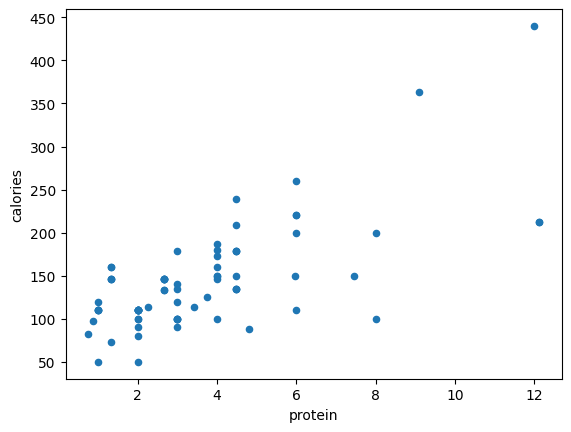

In [14]:
# You can code to create your scatter plot here:
df_final.plot.scatter(x='protein',y='calories')


**❓ Group Reflection❓**

**Q1**: Do you see any trends in the scatter plot? If your group were to describe the correlation, how would you all describe it? 
Is the relation positive or negative? Does it seem linear or non-linear? Is there a strong or weak relationship between the variables?

*(✏️ I did find a trend. I see that as the protein increases, so does the calories. I would describe the correlation as being strong and that the relation being position. It seems non linear.✏️)*

**Q2**: Looking back to the correlation coefficient in Puzzle 1.4, what was the correlation coefficient for this pair of data points?

*(✏️ 0.695204. ✏️)*

### Scatter Plot #2: Relationship Between Weight and Carbs

Create another scatterplot where the dependent variable (`y`) is `weight` and independent variable (`x`) is `carbs`:

<AxesSubplot: xlabel='carbs', ylabel='weight'>

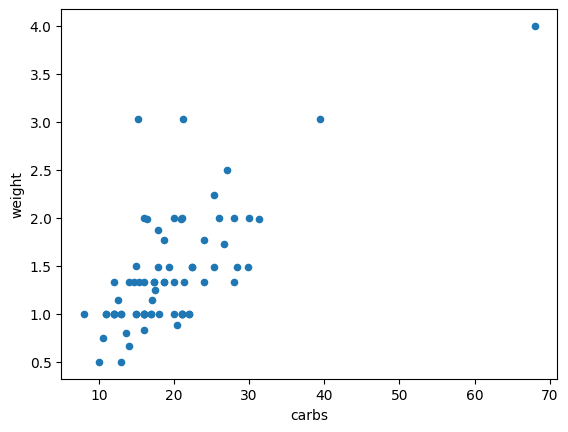

In [15]:
# You can code to create your scatter plot here:
df_final.plot.scatter(x='carbs',y='weight')


**❓ Group Reflection❓**

**Q1**: How would you describe the correlation for this scatterplot, make sure to be specific similar to last reflection? Additionally, do you think `carbs` would be a good predictor of weight? If yes, why so?

*(✏️ I see that the trend is upward and that as carbs increase so does the weight. I would describe the correlation as strong and positive. It seems to be linear. I think that carbs is a good predictor of weight because there is alot of carbs in cereal. ✏️)*

**Q2**: Looking back to the correlation coefficient in Puzzle 1.4, what was the correlation coefficient for this pair of data points?

*(✏️ 0.705361. ✏️)*

### Scatter Plot #3: Relationship Between Weight and Rating

Create a final scatterplot where the dependent variable (`y`) is `weight` and independent variable (`x`) is `rating`:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='rating', ylabel='weight'>

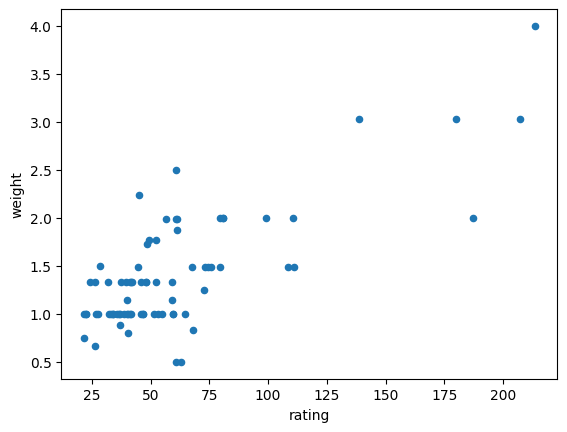

In [16]:
# You can code to create your scatter plot here
df_final.plot.scatter(x='rating',y='weight')



**❓ Group Reflection❓**

**Q1**: How would you describe the correlation for this scatterplot, make sure to be specific similar to last reflection? Additionally, do you think `rating` would be a good predictor of `weight`? If yes/no, why so?

*(✏️ I believe that the correlation of this scatterplot is a strong positive linear relationship. I think rating is a good predictor of weight because if the rating of cereal is good, more people would consume it and the good ratings come because of positive interactions with the cereal. If the people like eating the cereal and feel it is plentiful and weighs alot, they would rate it good.✏️)*

**Q2**: Looking back to the correlation coefficient in Puzzle 1.4, what was the correlation coefficient for this pair of data points?

*(✏️ 0.766750. ✏️)*

<hr style="color: #DD3403;">

## Part 2: Simple Linear Regression

In lecture, you learned that linear regression allows us to predict values based on the "line of best fit".  The equation for simple linear regression is:

$$Y = (slope) * X + intercept$$

where, X is our independent variable and Y is our dependent variable.

In this part of the lab, we want to explore the relationship between the `weight` (measures in ounces of cereal) of the cereal and the `carb` count (measured in grams of carbs) -- this is what you did in Scatter Plot #2 above!

## Puzzle 2.1: Calculating the Slope of the Regression Line

In lecture, you found how to compute the slope of the regression line.  Find the slope of the regression line where the dependent variable (`y`) is `weight` and independent variable (`x`) is `carbs`:

In [17]:
# Find the slope:
slope = 0.705361 * (df_final.weight.std() / df_final.carbs.std())
slope

0.05335652666942798

**Q**: How do you interpret your slope?  What does it mean in terms of the actual unit -- `weight` (oz.) and `carbs` (g)?

*(✏️ The weight that you get per carb in oz/g and how the relation changes as the graph increases. ✏️)*

## Puzzle 2.2: Calculating the Intercept of the Regression Line



In lecture, you also learned how to compute the y-intercept of the regression line.  Find the y-intercept of the regression line that you found the slope for in the previous puzzle.

In [18]:
# Find the intercept:
intercept = df_final["weight"].mean() - slope * df_final["carbs"].mean()
intercept

0.3723073249164399

**Q**: How do you interpret your intercept?  What does it mean in terms of the actual unit -- `weight` (oz.) and `carbs` (g)?  Does it even make sense in the context of this problem?

*(✏️ The intercept is the weight of the cereal when there are zero carbs. This weight makes sense as there are alot of carbs in cereal. ✏️)*

### 🔬 Test Case Checkpoint 🔬

In [19]:
## == TEST CASES for Puzzle 2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(round(intercept,2) == 0.37), "The intercept doesn't seem correct"
assert(round(slope,2) == 0.05), "The coefficent doesn't seem correct"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## View Your Work: Your Linear Regression Line

The following code using the `seaborn` graphics library to plot a linear regression line on a graph:

<AxesSubplot: xlabel='carbs', ylabel='weight'>

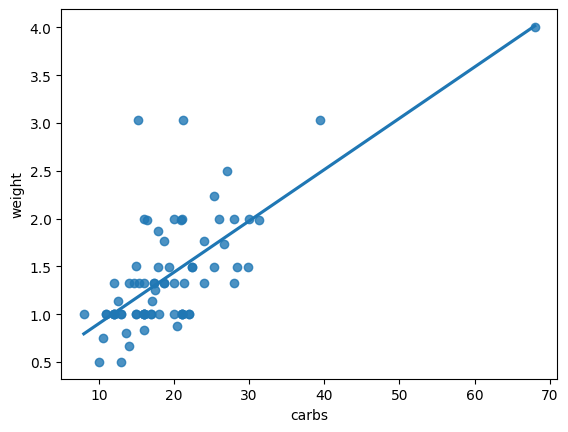

In [20]:
# Run the following code to see the regression line you made!!! :)
import seaborn as sns

# Create scatterplot with regression line:
sns.regplot(data=df_final, x="carbs", y="weight", ci=None)

<hr style="color: #DD3403;">

## Part 3: Adding Your Prediction to the Data

In Puzzle #2, you found the `intercept` ($\beta_0$) and a slope `slope` ($\beta_1$) to make a line of best fit.

Use your regression line to make a new column, `weight_predicted`, that stores the predicted weight for each cereal based off the `carbs` in each cereal. Use the equation of the regression line to make the predictions.

- Remember, the linear regression equation is $Y = (intercept) + X * (slope)$

In [24]:
df_final["weight_predicted"] = df_final["carbs"] * slope + intercept
df_final

,name,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,weight,cups,rating,weight_predicted
0,100% Bran,212.12,12.12,3.03,393.94,30.30,15.15,18.18,848.48,75.76,3.03,1.0,207.28,1.180659
1,100% Natural Bran,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.00,1.00,1.0,33.98,0.799160
2,All-Bran,212.12,12.12,3.03,787.88,27.27,21.21,15.15,969.70,75.76,3.03,1.0,180.08,1.503999
3,All-Bran with Extra Fiber,100.00,8.00,0.00,280.00,28.00,16.00,0.00,660.00,50.00,2.00,1.0,187.41,1.226012
4,Almond Delight,146.67,2.67,2.67,266.67,1.33,18.67,10.67,NaN,33.33,1.33,1.0,45.85,1.368474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,146.67,2.67,1.33,333.33,0.00,28.00,4.00,80.00,33.33,1.33,1.0,52.14,1.866290
73,Trix,110.00,1.00,1.00,140.00,0.00,13.00,12.00,25.00,25.00,1.00,1.0,27.75,1.065942
74,Wheat Chex,149.25,4.48,1.49,343.28,4.48,25.37,4.48,171.64,37.31,1.49,1.0,74.31,1.725962
75,Wheaties,100.00,3.00,1.00,200.00,3.00,17.00,3.00,110.00,25.00,1.00,1.0,51.59,1.279368


<hr style="color: #DD3403;">

## Part 4: Residuals

Residuals are the differences between the observed value of y (`weight`) and the predicted value of y (`weight_predicted`, or just $\hat{y}$).

Lets find the residuals!

## Puzzle 4.1: Calculating the Residuals

In the following cell, write the Python code to store the residual for the weight column as `residual`:

In [25]:
df_final["residual"] = df_final["weight"] - df_final["weight_predicted"]
df_final

,name,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,weight,cups,rating,weight_predicted,residual
0,100% Bran,212.12,12.12,3.03,393.94,30.30,15.15,18.18,848.48,75.76,3.03,1.0,207.28,1.180659,1.849341
1,100% Natural Bran,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.00,1.00,1.0,33.98,0.799160,0.200840
2,All-Bran,212.12,12.12,3.03,787.88,27.27,21.21,15.15,969.70,75.76,3.03,1.0,180.08,1.503999,1.526001
3,All-Bran with Extra Fiber,100.00,8.00,0.00,280.00,28.00,16.00,0.00,660.00,50.00,2.00,1.0,187.41,1.226012,0.773988
4,Almond Delight,146.67,2.67,2.67,266.67,1.33,18.67,10.67,NaN,33.33,1.33,1.0,45.85,1.368474,-0.038474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,146.67,2.67,1.33,333.33,0.00,28.00,4.00,80.00,33.33,1.33,1.0,52.14,1.866290,-0.536290
73,Trix,110.00,1.00,1.00,140.00,0.00,13.00,12.00,25.00,25.00,1.00,1.0,27.75,1.065942,-0.065942
74,Wheat Chex,149.25,4.48,1.49,343.28,4.48,25.37,4.48,171.64,37.31,1.49,1.0,74.31,1.725962,-0.235962
75,Wheaties,100.00,3.00,1.00,200.00,3.00,17.00,3.00,110.00,25.00,1.00,1.0,51.59,1.279368,-0.279368


In [26]:
## == TEST CASES for Puzzle 4.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(round(df_final["residual"].sum(), 0) == 0), "The residuals might not be correct. Please check again!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 4.2: What is the Average Error?

In the following cell, calculate the average error in your prediction.

- **Key Observation**: You cannot use `df_final.residual.mean()`.  Linear regression finds the "line of best fit" that will ensure half of the error is above the line and half of it is below -- so a simple `mean` will be `0`.

- You can either find the RMSE (we did this in lecture) or mean absolute error (MAE).  Your choice! :)

Find the `avg_error` in the cell below:

In [27]:
avg_error = (1 - (0.705361)**2)**0.5
avg_error

0.7088482628031192

In [28]:
## == TEST CASES for Puzzle 4.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert(avg_error > 0.3), "Your average error is incorrect. :("

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


**❓ Final Reflection❓**

**Q**: How do you interpret your average error?  What does it mean in terms of the actual unit -- `weight` (oz.) and `carbs` (g)?

*(✏️ Because the average error is closer to one, I believe that the predictions we made are fairly accurate. It means that on average the oz/g have an average error of 0.7088✏️)*

<hr style="color: #DD3403;">

# Submission


You're almost done! All you need to do is to commit your lab to GitHub:

1. Make certain to save your work. To do this, go to **File => Save All**

2. After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)